In [177]:
from astropy.io import fits
from astropy.io.fits import getdata
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Set the size of plot size
plt.rcParams["figure.figsize"] = (8,8)

In [120]:
# Append one FITS table to the other one
with fits.open('/Users/rliu/Downloads/test/mergePatchSrc/meas-g-0-1,1.fits') as hdul1:
    with fits.open('/Users/rliu/Downloads/test/mergePatchSrc/meas-g-0-1,2.fits') as hdul2:
        nrows1 = hdul1[1].data.shape[0]
        nrows2 = hdul2[1].data.shape[0]
        nrows = nrows1 + nrows2
        hdu = fits.BinTableHDU.from_columns(hdul1[1].columns, nrows=nrows)
        for colname in hdul1[1].columns.names:
            hdu.data[colname][nrows1:] = hdul2[1].data[colname]

In [121]:
# The total object number in the merged table
data_sum = hdu.data
print('Sum of object number in two input FITS table =', data_sum.shape[0])

Sum of object number in two input FITS table = 28686


In [122]:
hdu.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1509 / length of dimension 1                          
NAXIS2  =                28686 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  195 / number of table fields                         
TTYPE1  = 'flags   '                                                            
TFORM1  = '163X    '                                                            
TTYPE2  = 'id      '                                                            
TFORM2  = '1K      '                                                            
TTYPE3  = 'coord_ra'        

In [189]:
# Parent and Child objects may have same ra&dec. Filter and keep only Children objects.
data_sum_child = data_sum[data_sum['deblend_nChild']==0]
print('Number of Child objects in the sum FITS table=', data_sum_child.shape[0])

Number of Child objects in the sum FITS table= 25645


In [190]:
# Select the ra & dec columns and stack them together
data_slice = np.stack((data_sum_child['coord_ra'], data_sum_child['coord_dec']), axis = 1)

In [192]:
# Get the unique indices of objects with same ra + dec
_, unq_row_indices = np.unique(data_slice, return_index=True, axis=0)

In [193]:
# Select only the unique objects
data_sum_child_unique = data_sum_child[unq_row_indices]

In [194]:
print('Total object number after removing duplicate ones =', data_sum_child_unique.shape[0])

Total object number after removing duplicate ones = 25339


In [160]:
hdu.data = data_sum_child_unique

In [163]:
hdu.writeto('/Users/rliu/Downloads/test/mergePatchSrc/mergedSrc.fits')
print('The merged FITS file is saved!')

### Verification of the duplicate objects

The width of the overlap between two patches is about 63.7arcsec.
I'll plot the duplicate objects together with all the objects.

In [195]:
data_sum_child_duplicate = np.delete(data_sum_child, (unq_row_indices), axis=0)

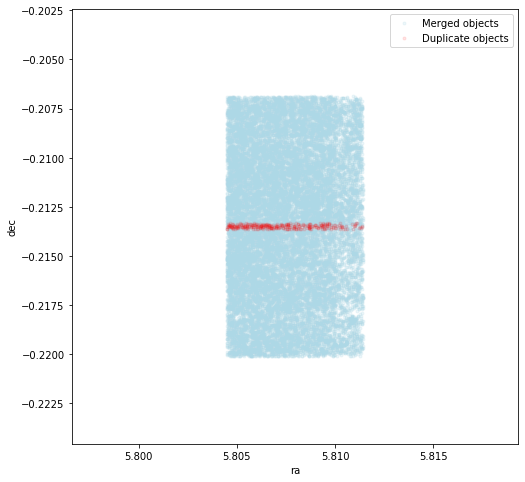

In [196]:
plt.scatter(data_sum_child_unique['coord_ra'], data_sum_child_unique['coord_dec'], color='lightblue', 
            alpha=0.2, marker='.', label='Merged objects')
plt.scatter(data_sum_child_duplicate['coord_ra'], data_sum_child_duplicate['coord_dec'], color='red', 
            alpha=0.1, marker='.', label='Duplicate objects')
plt.xlabel('ra')
plt.ylabel('dec')
plt.axis('equal')
plt.legend()
plt.show()

In [197]:
data_sum_child_duplicate.shape

(306,)

### Scratch

In [ ]:
# Corners of the first patch (13609 objects):
# (5.80448, -0.213341)  (5.81139, -0.213341)
# (5.80448, -0.220097)  (5.81139, -0.220097)

# Corners of the second patch (15077 objects):
# (5.80448, -0.206884)  (5.81139, -0.206884)
# (5.80448, -0.213650)  (5.81139, -0.213650)

In [158]:
d_slice = np.array([[1,0],
            [2,2],
            [1,0],
            [3,2],
            [3,3],
            [2,2]])

In [164]:
d_slice.shape

(6, 2)

In [42]:
_, unq_row_indices = np.unique(d_slice,return_index=True,axis=0)
unq_row_indices

array([0, 1, 3, 4])

In [58]:
d_duplicate = np.delete(d_slice, (unq_row_indices), axis=0)
d_duplicate

array([[1, 0],
       [2, 2]])

In [168]:
np.where(d_slice == 3)

(array([3, 4, 4]), array([0, 0, 1]))

In [170]:
np.equal([0, 1, 3], np.arange(3))

array([ True,  True, False])

In [171]:
np.arange(3)

array([0, 1, 2])